<a href="https://colab.research.google.com/github/sharithomas/Python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Series is a one-dimensional labeled array capable of holding any data type
(integers,strings, floating point numbers, Python objects, etc.).
The axis labels are collectively referred to as the index.

Index = [0, ..., len(data) - 1].

In [1]:
import pandas as pd
import numpy as np
pd.Series()

ser = pd.Series([1,2,3,4])
ser

,0
0,1
1,2
2,3
3,4


In [ ]:
type(ser)

pandas.core.series.Series

In [ ]:
ser1=pd.Series([1,2,3,4],index=["a","b","c","d"])
ser1.name = 'Age'
ser1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
ser2=pd.Series([1,2,3,4],index=[0,2,4,7])
ser2

,0
0,1
2,2
4,3
7,4


' The data can also come from dict , array or scalar . '

In [2]:
# dict

sample_dict = {'a':1,'b':2,'c':3,'d':4}
ps=pd.Series(sample_dict)
ps
ps=pd.Series(sample_dict,index=['a','b','c'])
ps


,0
a,1
b,2
c,3


In [ ]:
ps=pd.Series(sample_dict,index=['a','b','c','e'])
ps

,0
a,1.0
b,2.0
c,3.0
e,NaN


In [ ]:
type(ps)

pandas.core.series.Series

In [ ]:
#array
tt=pd.Series(np.array([1,2,4]),index=np.array(['a','a','c']))
tt.reindex(['a'])

# also to note index can also be non-unique but certain
# operations may not allow where an exception would be raised.

ValueError: cannot reindex on an axis with duplicate labels

In [5]:
sample_dict

pd.Series(sample_dict,index=['a','b','e','b'])  # reindex

a = pd.Series(sample_dict,index=['a','b','e'])
a
#type(a['e'])

# the NaN is used for missing values - as a standard.


,0
a,1.0
b,2.0
e,NaN


'DataFrame is a 2-dimensional labeled data structure with columns of different types.'

In [6]:
import pandas as pd
import numpy as np

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
type(data)
data

frame = pd.DataFrame(data)
type(frame)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [7]:
frame.name = "Home"
frame
frame.name
frame.year
frame.state
type(frame.year)

pandas.core.series.Series

In [8]:
frame1 = pd.DataFrame(data,columns=['year','pop','state','ee'])
frame1

frame2 = pd.DataFrame(data,columns=['year','pop','state'],index=['one','two','three','four','five'])
frame2

,year,pop,state
one,2000,1.5,Ohio
two,2001,1.7,Ohio
three,2002,3.6,Ohio
four,2001,2.4,Nevada
five,2002,2.9,Nevada


' # Column Selection , Addition and Deletion '

In [11]:
frame
type(frame)

frame.year
frame.state

frame[  'year'   ]
type(frame['year'])

frame[['year','pop']]
#frame['year','pop']  #error
type(frame[  ['year','pop']  ])

frame.ndim
frame.shape

frame.year
type(frame.year)

frame.head()  # n = 5

frame['new_col'] = frame.year * 2
frame['new_col_bool'] = frame.year > 2001

frame.head()


,state,year,pop,new_col,new_col_bool
0,Ohio,2000,1.5,4000,False
1,Ohio,2001,1.7,4002,False
2,Ohio,2002,3.6,4004,True
3,Nevada,2001,2.4,4002,False
4,Nevada,2002,2.9,4004,True


In [14]:
frame['new_col'] = frame.year * 2
frame['new_col_bool'] = frame.year > 2001

frame.head()


del frame['new_col_bool']

# del frame[['new_col','new_col_bool']] #invalid

frame.head()

frame['new_col'] = frame.year ** 2
frame['new_col_bool'] = frame.year > 2001

series_op = frame.pop('new_col')

#series_op = frame.pop()  # needs one posit.argument
series_op

,new_col
0,4000000
1,4004001
2,4008004
3,4004001
4,4008004


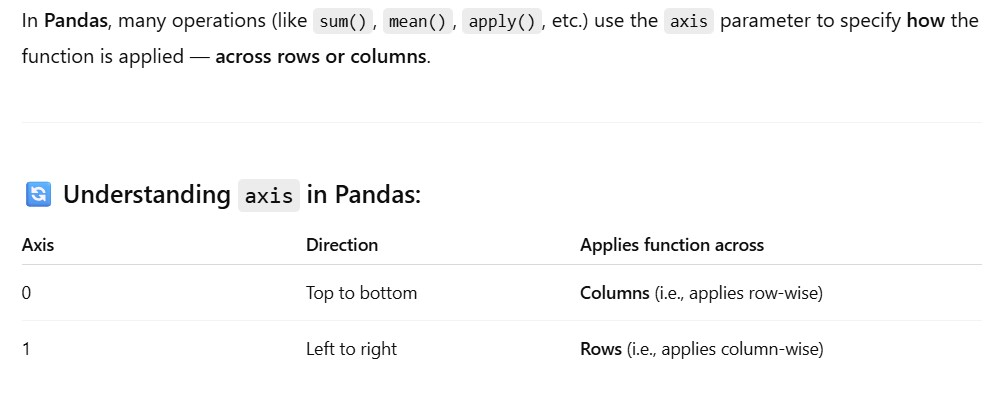

In [16]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

data

frame = pd.DataFrame(data)

frame['new_cal']=frame.year*2
series_op=frame.pop('new_cal')

series_op1 = pd.concat([series_op,frame.pop('year')],axis=1)

#series_op2 = pd.concat([series_op,frame.pop('year')],axis=0)
series_op

,new_cal
0,4000
1,4002
2,4004
3,4002
4,4004


' # Function application and mapping '

In [17]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(8, 4))
df
type(df)
np.exp(df)  # numpy functions retain the df-structure.

type(np.exp(df))

type(np.exp(df[0]))

jj=np.exp(df[0])

In [18]:
# Write a UDF to find diff between max-min for each columns
df.apply(max)

df.apply(max,axis=1)

df.apply(max,axis=0)

df.apply(max)-df.apply(min)

df.apply(lambda x:x.max()-x.min(),axis=1)

df.apply(lambda x:x.max()-x.min(),axis=0)

,0
0,2.336578
1,2.449893
2,2.822343
3,3.177848
